In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.info() # from the info we can infer that all the columns are numeric and no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
YearsExperience    31 non-null float64
Salary             31 non-null float64
dtypes: float64(2)
memory usage: 576.0 bytes


In [3]:
# find the statistic information
data.describe() # when you see the YearsExperience we can find that some outlier is present in it 

,YearsExperience,Salary
count,31.000000,3.100000e+01
mean,8.367742,3.584299e+09
std,17.233599,1.995611e+10
min,1.100000,3.773100e+04
25%,3.200000,5.679950e+04
50%,4.900000,6.602900e+04
75%,8.050000,1.034420e+05
max,100.000000,1.111110e+11


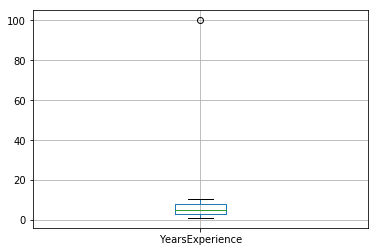

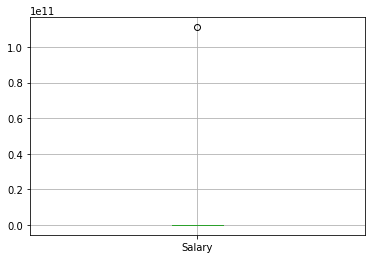

In [4]:
# outliers can be found either by IQR calculation or the Box plot
# how to create a BOX plot
for columns in data:
    plt.figure()
    data.boxplot([columns])

In [12]:
# calculate the IQR to detect the outliers and eliminate it
def outlier_detection(col):
    sorted(col) # sort the values in the column.
    # calculate the Q1 and Q3 (ie., 25% and 75%)
    Q1,Q3=np.percentile(col,[25,75])
    IQR = Q3-Q1
    Lower_range = Q1 -(1.5*IQR)
    upper_range = Q3 +(1.5*IQR)
    return Lower_range,upper_range

In [13]:
lr,ur=outlier_detection(data.YearsExperience)
print("lower range={},upper_range={}".format(lr,ur))

lower range=-4.075,upper_range=15.325000000000001


In [25]:
#Getting the index of the outlier.
outlierIndex=data.index[(data.YearsExperience < lr) | (data.YearsExperience > ur)]

In [26]:
# Drop the outlier from the data using the index
data.drop(outlierIndex,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 720.0 bytes


# Creating the Linear Regression Model.
Since we have single variable and single label we are creating the Simple Regression Model
Steps to Create the Linear regression Model:
    1. Seperate the Data as features and Labels in 2D-form
    2. Split the data into Test and Train
    3. build the model using Train.
    4. Find the Score of the model using Train and Train.
    5. Check whether the model is generalized
    6. Deploy the model using pickel.

In [30]:
# Sperating the data as features and labels as numpy array in 2d form which is required for sklearn during model building
features=data.iloc[:,[0]].values
label=data.iloc[:,[1]].values
print(features.shape)
print(label.shape)

(30, 1)
(30, 1)


In [47]:
from sklearn.model_selection import train_test_split
# Split the data into Test and Train
x_train,x_test,y_train,y_test=train_test_split(features,
                                              label,
                                               test_size=0.20, 
                                               random_state=1)

In [48]:
# Building the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)# Training my model
                          # Creating intercept and coeff

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
# Evaluating the Linear regression Model - Find the score of Test and Train data.
train_score = model.score(x_train,y_train)
test_score = model.score(x_test,y_test)
print("training Score {}".format(train_score))
print("testing Score {}".format(test_score))

training Score 0.9677558036981184
testing Score 0.7616681465472094


#If your training score is less than testing score, you can conclude that the model is a generalized model !!!!

In [50]:
if train_score < test_score:
    print('model is generalized')
else:
    print('Remodel it!')

Remodel it!


# How to remodel?
we can try to remodel using the random_state set to different values and check the best fit model

In [51]:
#it is not maditory to import since we already imported but to keep all lines together i am import the required libraries again
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for i in range(1,101):
    x_train,x_test,y_train,y_test=train_test_split(features,
                                              label,
                                               test_size=0.20, 
                                               random_state=i)
    model=LinearRegression()
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    if train_score < test_score:
        print("training Score {}, testing Score {} random_state={}".format(train_score,test_score,i))


training Score 0.9545249190394052, testing Score 0.9695039421049821 random_state=3
training Score 0.9528197369259258, testing Score 0.9631182154839475 random_state=8
training Score 0.9494673013344644, testing Score 0.9816423482070255 random_state=10
training Score 0.9527636176933665, testing Score 0.9606215790278543 random_state=14
training Score 0.9460054870434312, testing Score 0.9835849730044817 random_state=26
training Score 0.9527636606684406, testing Score 0.9636425773684423 random_state=27
training Score 0.9400496694274888, testing Score 0.9944092048209744 random_state=30
training Score 0.9486350116716654, testing Score 0.9778242092591889 random_state=37
training Score 0.9473317052697812, testing Score 0.9724794487377619 random_state=38
training Score 0.9492886917497556, testing Score 0.9928344802911048 random_state=39
training Score 0.9491742100347064, testing Score 0.9802519469633169 random_state=41
training Score 0.948821675263085, testing Score 0.9789129767378081 random_stat

from the above range we have to test the best randon seed - i.e, select the random seed that has the highest testing score.
from the above random_state=30 is the best generalized model.

Now remodel your Linera regression using this random_state.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


x_train,x_test,y_train,y_test=train_test_split(features,
                                          label,
                                           test_size=0.20, 
                                           random_state=30)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
print("intercept={} and coef={}".format(model.intercept_,model.coef_))

intercept=[25566.43561641] and coef=[[9481.03756369]]


Mathematically we can say 

Salary = 25566.43561641 + 9481.03756369*YearsExperience

or we can say as the unit increase in the YearsExperience shall increase the Salary by 9481.03756369

In [58]:
#Salary = b0 + b1(yearsExper)
print("The equation of regression line is Salary = {} + {} * YearsExperience".format(model.intercept_,model.coef_))

The equation of regression line is Salary = [25566.43561641] + [[9481.03756369]] * YearsExperience


# Now Deploy the model using Pickle

In [60]:
#save and load your machine learning model in Python using scikit-learn.
import pickle
pickle.dump(model,open('SalaryPredictor.model','wb'))